In [1]:
import os
import glob
from osgeo import gdal
import rasterio
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [2]:
#Reading Images
image_names = glob.glob(r'Test Data/Images/*.tif')
print(image_names)

['Test Data/Images/img545.tif', 'Test Data/Images/img937.tif', 'Test Data/Images/img683.tif', 'Test Data/Images/img124.tif', 'Test Data/Images/img652.tif', 'Test Data/Images/img233.tif', 'Test Data/Images/img594.tif', 'Test Data/Images/img776.tif', 'Test Data/Images/img317.tif', 'Test Data/Images/img17.tif', 'Test Data/Images/img1072.tif', 'Test Data/Images/img813.tif', 'Test Data/Images/img461.tif', 'Test Data/Images/img539.tif', 'Test Data/Images/img158.tif', 'Test Data/Images/img189.tif', 'Test Data/Images/img771.tif', 'Test Data/Images/img310.tif', 'Test Data/Images/img10.tif', 'Test Data/Images/img1075.tif', 'Test Data/Images/img466.tif', 'Test Data/Images/img814.tif', 'Test Data/Images/img299.tif', 'Test Data/Images/img629.tif', 'Test Data/Images/img248.tif', 'Test Data/Images/img868.tif', 'Test Data/Images/img1009.tif', 'Test Data/Images/img930.tif', 'Test Data/Images/img542.tif', 'Test Data/Images/img123.tif', 'Test Data/Images/img684.tif', 'Test Data/Images/img655.tif', 'Test 

In [3]:
image_names.sort()
print(image_names)

['Test Data/Images/img1.tif', 'Test Data/Images/img10.tif', 'Test Data/Images/img100.tif', 'Test Data/Images/img1000.tif', 'Test Data/Images/img1001.tif', 'Test Data/Images/img1002.tif', 'Test Data/Images/img1003.tif', 'Test Data/Images/img1004.tif', 'Test Data/Images/img1005.tif', 'Test Data/Images/img1006.tif', 'Test Data/Images/img1007.tif', 'Test Data/Images/img1008.tif', 'Test Data/Images/img1009.tif', 'Test Data/Images/img101.tif', 'Test Data/Images/img1010.tif', 'Test Data/Images/img1011.tif', 'Test Data/Images/img1012.tif', 'Test Data/Images/img1013.tif', 'Test Data/Images/img1014.tif', 'Test Data/Images/img1015.tif', 'Test Data/Images/img1016.tif', 'Test Data/Images/img1017.tif', 'Test Data/Images/img1018.tif', 'Test Data/Images/img1019.tif', 'Test Data/Images/img102.tif', 'Test Data/Images/img1020.tif', 'Test Data/Images/img1021.tif', 'Test Data/Images/img1022.tif', 'Test Data/Images/img1023.tif', 'Test Data/Images/img1024.tif', 'Test Data/Images/img1025.tif', 'Test Data/Imag

In [4]:
print(len(image_names))

1080


In [5]:
images_names_ = [gdal.Open(img).ReadAsArray() for img in image_names]

In [6]:
image_dataset = np.array(images_names_)

In [7]:
# image_dataset_ = np.asarray(image_dataset, dtype=int)
image_dataset_ = np.asarray(image_dataset, dtype='int8')

In [8]:
image_dataset_

array([[[[ -72,  -96, -104, ...,  -73,  -63,  -64],
         [-106,  -83,  -92, ...,  -55,  -58,  -61],
         [-115,  -86,  -69, ...,  -59,  -61,  -60],
         ...,
         [-114, -116, -115, ..., -120, -118, -117],
         [-116, -115, -115, ..., -118, -117, -118],
         [-117, -113, -116, ..., -118, -118, -118]],

        [[ -82, -103, -111, ..., -106, -100, -102],
         [-114,  -91,  -99, ...,  -88,  -96,  -99],
         [-123,  -95,  -78, ...,  -93,  -98,  -98],
         ...,
         [-124, -126, -125, ..., -127, -124, -124],
         [-126, -126, -126, ..., -124, -123, -125],
         [-127, -123, -126, ..., -125, -124, -125]],

        [[ -83, -104, -112, ..., -106, -100, -104],
         [-116,  -92, -100, ...,  -89,  -97, -101],
         [-123,  -95,  -78, ...,  -93, -100, -101],
         ...,
         [ 126,  124,  125, ...,  126, -128, -128],
         [ 123,  125,  125, ..., -128, -127,  127],
         [ 123,  126,  124, ..., -128, -128,  127]],

        [[  69, 

In [9]:
image_dataset_.shape

(1080, 5, 512, 512)

In [10]:
image_dataset_.dtype

dtype('int8')

In [11]:
#Reading Masks

mask_names = glob.glob(r'Test Data/Masks_8/*.tif')
print(mask_names)

['Test Data/Masks_8/mask909.tif.tif', 'Test Data/Masks_8/mask19.tif.tif', 'Test Data/Masks_8/mask178.tif.tif', 'Test Data/Masks_8/mask332.tif.tif', 'Test Data/Masks_8/mask400.tif.tif', 'Test Data/Masks_8/mask527.tif.tif', 'Test Data/Masks_8/mask188.tif.tif', 'Test Data/Masks_8/mask1031.tif.tif', 'Test Data/Masks_8/mask215.tif.tif', 'Test Data/Masks_8/mask523.tif.tif', 'Test Data/Masks_8/mask769.tif.tif', 'Test Data/Masks_8/mask211.tif.tif', 'Test Data/Masks_8/mask1035.tif.tif', 'Test Data/Masks_8/mask799.tif.tif', 'Test Data/Masks_8/mask336.tif.tif', 'Test Data/Masks_8/mask404.tif.tif', 'Test Data/Masks_8/mask822.tif.tif', 'Test Data/Masks_8/mask219.tif.tif', 'Test Data/Masks_8/mask184.tif.tif', 'Test Data/Masks_8/mask761.tif.tif', 'Test Data/Masks_8/mask646.tif.tif', 'Test Data/Masks_8/mask15.tif.tif', 'Test Data/Masks_8/mask905.tif.tif', 'Test Data/Masks_8/mask791.tif.tif', 'Test Data/Masks_8/mask174.tif.tif', 'Test Data/Masks_8/mask408.tif.tif', 'Test Data/Masks_8/mask642.tif.tif', 

In [12]:
mask_names.sort()
print(mask_names)

['Test Data/Masks_8/mask1.tif.tif', 'Test Data/Masks_8/mask10.tif.tif', 'Test Data/Masks_8/mask100.tif.tif', 'Test Data/Masks_8/mask1000.tif.tif', 'Test Data/Masks_8/mask1001.tif.tif', 'Test Data/Masks_8/mask1002.tif.tif', 'Test Data/Masks_8/mask1003.tif.tif', 'Test Data/Masks_8/mask1004.tif.tif', 'Test Data/Masks_8/mask1005.tif.tif', 'Test Data/Masks_8/mask1006.tif.tif', 'Test Data/Masks_8/mask1007.tif.tif', 'Test Data/Masks_8/mask1008.tif.tif', 'Test Data/Masks_8/mask1009.tif.tif', 'Test Data/Masks_8/mask101.tif.tif', 'Test Data/Masks_8/mask1010.tif.tif', 'Test Data/Masks_8/mask1011.tif.tif', 'Test Data/Masks_8/mask1012.tif.tif', 'Test Data/Masks_8/mask1013.tif.tif', 'Test Data/Masks_8/mask1014.tif.tif', 'Test Data/Masks_8/mask1015.tif.tif', 'Test Data/Masks_8/mask1016.tif.tif', 'Test Data/Masks_8/mask1017.tif.tif', 'Test Data/Masks_8/mask1018.tif.tif', 'Test Data/Masks_8/mask1019.tif.tif', 'Test Data/Masks_8/mask102.tif.tif', 'Test Data/Masks_8/mask1020.tif.tif', 'Test Data/Masks_8/

In [13]:
print(len(image_names))

1080


In [14]:
mask_names_ = [gdal.Open(mask).ReadAsArray() for mask in mask_names]

In [15]:
mask_dataset = np.array(mask_names_)

In [16]:
# mask_dataset_ = np.asarray(mask_dataset, dtype = int)
mask_dataset_ = np.asarray(mask_dataset, dtype = 'int8')

In [17]:
mask_dataset_

array([[[  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        ...,
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127]],

       [[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       ...,

       [[ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2

In [18]:
mask_dataset_.dtype

dtype('int8')

In [19]:
_mask_dataset_ = np.copy(mask_dataset_) #Make a copy

In [20]:
_mask_dataset_[_mask_dataset_ == -2] = 0

In [21]:
#Maximum and Minimum value in images
print(np.nanmax(image_dataset_))
print(np.nanmin(image_dataset_))

127
-128


In [22]:
#Maximum and Minimum value in Masks
print(np.nanmax(_mask_dataset_))
print(np.nanmin(_mask_dataset_))

127
0


In [23]:
#Labels in the mask are
np.unique(_mask_dataset_)

array([  0, 127], dtype=int8)

In [24]:
print(image_dataset_.shape)
print(_mask_dataset_.shape)

(1080, 5, 512, 512)
(1080, 512, 512)


In [25]:
# Dimension expanding
new_image_dataset = np.expand_dims(image_dataset_, axis = 4)
new_mask_dataset = np.expand_dims(_mask_dataset_, axis = 3)

In [26]:
#Check shape of images and mask 
print(new_image_dataset.shape)
print(new_mask_dataset.shape)

(1080, 5, 512, 512, 1)
(1080, 512, 512, 1)


In [27]:
#Normalize images
new_image_dataset_ = new_image_dataset /127.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
new_mask_dataset_ = new_mask_dataset /127.  #Pixel values will be 0 or 1

In [29]:
#Maximum in image dataset and unique value in mask dataset after normalization 
print(np.nanmax(new_image_dataset_))
print(np.nanmin(new_image_dataset_))
print(np.unique(new_mask_dataset_))

1.0
-1.0078740157480315
[0. 1.]


In [30]:
print(new_image_dataset_.dtype)
print(new_mask_dataset_.dtype)

float64
float64


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Training and Testing Splitting
X_train, X_test, y_train, y_test = train_test_split(new_image_dataset_, new_mask_dataset_, test_size = 0.10, random_state = 42)

In [33]:
#Checking shape of training testing images and masks
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(972, 5, 512, 512, 1)
(972, 512, 512, 1)
(108, 5, 512, 512, 1)
(108, 512, 512, 1)


In [34]:
#Checking data type of training testing images and masks
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


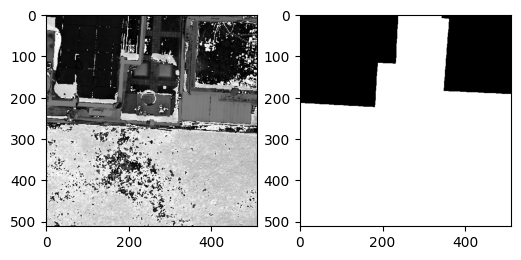

In [35]:
#Sanity check, view few images and masks
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()
# plt.savefig("E://ss.png")

In [36]:
X_train_ = np.transpose(X_train, (0, 2, 3, 1, 4))
X_test_ = np.transpose(X_test, (0, 2, 3, 1, 4))
print(X_train_.shape)
print(X_test_.shape)

(972, 512, 512, 5, 1)
(108, 512, 512, 5, 1)


In [37]:
#Unet Implementation
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import keras
from keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

In [38]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Concatenate, Dropout, Lambda
from tensorflow.keras.models import Model
from keras.layers import Activation, MaxPool2D, Concatenate

In [39]:
#Build UNet
x_inputs = Input(shape=(512, 512, 5))

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x_inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

x_outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c9)

model = Model(inputs=x_inputs, outputs=x_outputs, name="U-Net")

"""# Metrics """

#f1, recall, precision metics 

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

model.summary()

2022-11-25 11:30:08.974022: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  736         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [40]:
from keras.utils import plot_model

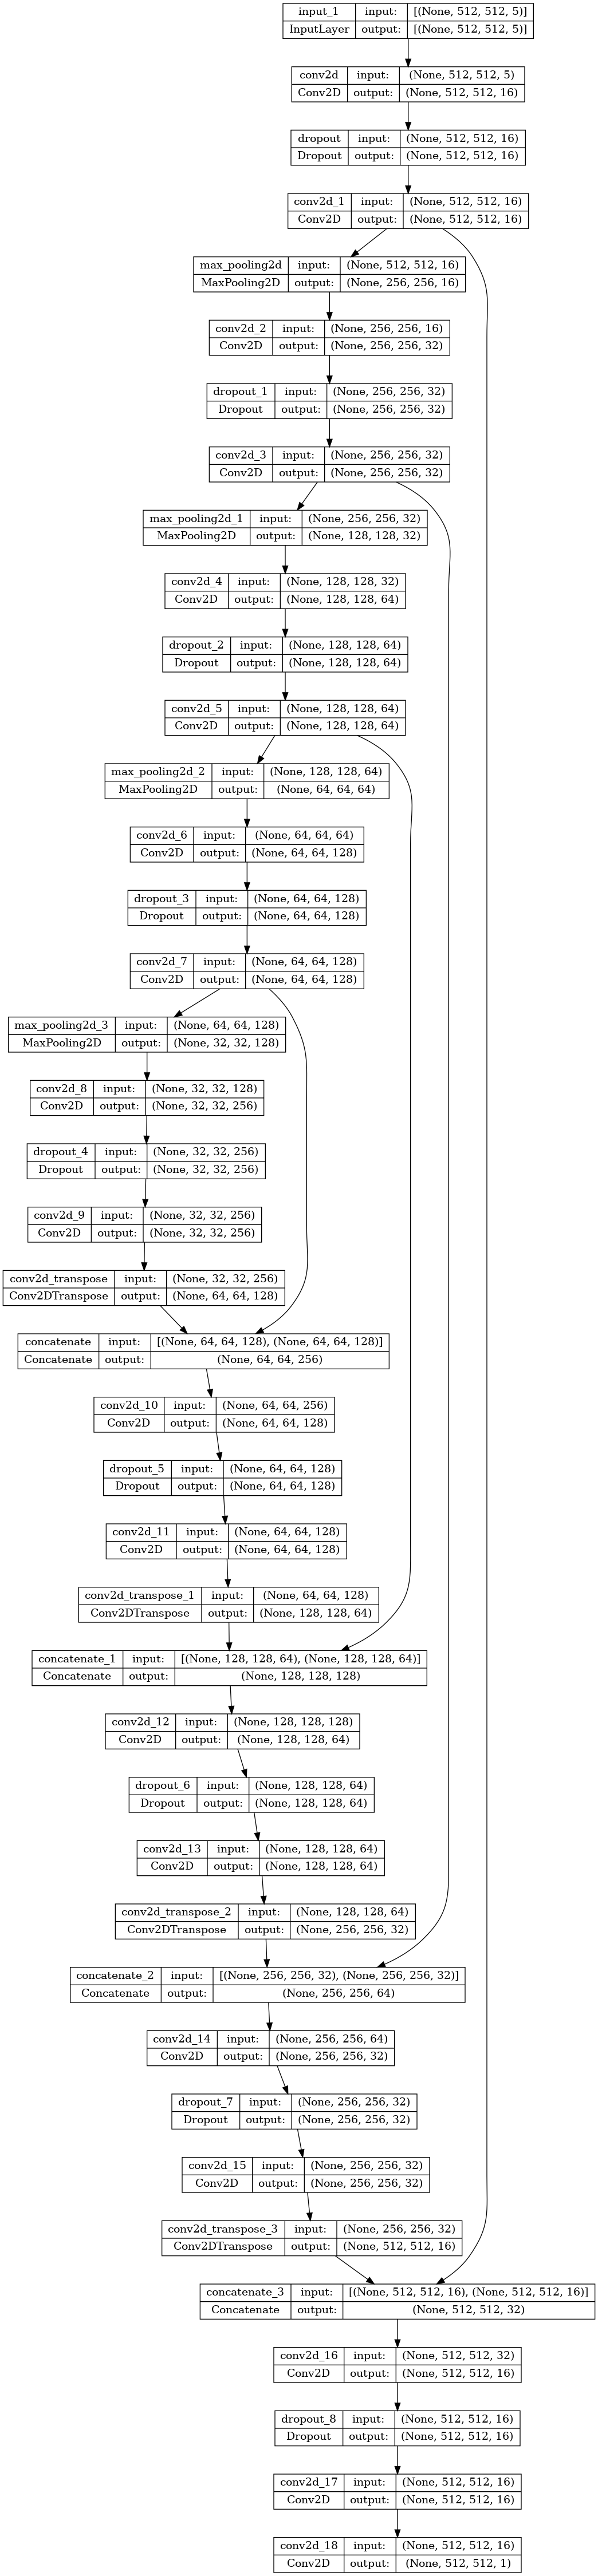

In [41]:
keras.utils.plot_model(model, "Unet_model_19L.png", show_shapes=True)

In [ ]:
# # checkpoint
# filepath = "UNet_Building_weights_best1.hdf5"

In [ ]:
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
# earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)
# callbacks_list = [checkpoint, earlystopping]

In [42]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_, y_train,
                    batch_size=16,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_test_, y_test))
                    # callbacks=[callback],
                    # shuffle=False)
# len(history.history['loss'])
# Two things will try - try without callback epochs 50, and try only check point and try together with patience: 5 again

Epoch 1/50
61/61 [==============================] - 775s 13s/step - loss: 0.6554 - acc: 0.6361 - f1_m: 0.6707 - precision_m: 0.6351 - recall_m: 0.7299 - val_loss: 0.6367 - val_acc: 0.6695 - val_f1_m: 0.6910 - val_precision_m: 0.6308 - val_recall_m: 0.7763
Epoch 2/50
61/61 [==============================] - 752s 12s/step - loss: 0.6158 - acc: 0.6868 - f1_m: 0.7223 - precision_m: 0.6653 - recall_m: 0.8005 - val_loss: 0.5990 - val_acc: 0.6802 - val_f1_m: 0.7144 - val_precision_m: 0.6292 - val_recall_m: 0.8387
Epoch 3/50
61/61 [==============================] - 747s 12s/step - loss: 0.5953 - acc: 0.6952 - f1_m: 0.7310 - precision_m: 0.6721 - recall_m: 0.8152 - val_loss: 0.6008 - val_acc: 0.6763 - val_f1_m: 0.7272 - val_precision_m: 0.6144 - val_recall_m: 0.9039
Epoch 4/50
61/61 [==============================] - 740s 12s/step - loss: 0.5888 - acc: 0.7007 - f1_m: 0.7390 - precision_m: 0.6730 - recall_m: 0.8307 - val_loss: 0.5739 - val_acc: 0.6900 - val_f1_m: 0.7291 - val_precision_m: 0.6322

In [43]:
#Evaluating the model
score = model.evaluate(X_test_, y_test, verbose = 0) 
print('Val Loss:', score[0]) 
print('Val Accuracy:', score[1])
print('Val F1 score:', score[2])
print('Val Precision:', score[3])
print('Test Recall:', score[4])

Val Loss: 0.5030421018600464
Val Accuracy: 0.7704948782920837
Val F1 score: 0.7904599905014038
Val Precision: 0.7237396836280823
Test Recall: 0.8738255500793457


In [44]:
#Save the model for future use
model.save(r'Final Year Project Thesis/UNet_Building_90_10_BS16_E50.hdf5')

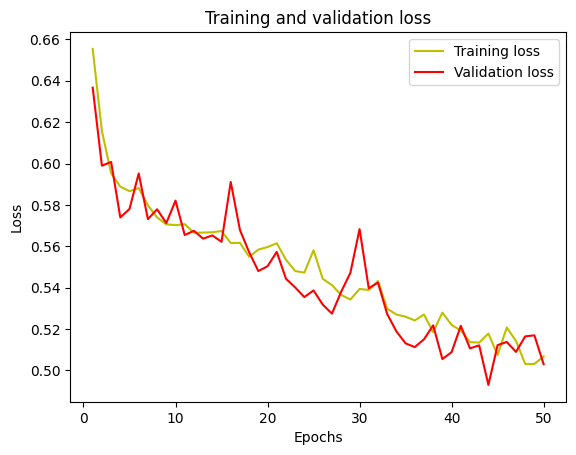

In [45]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

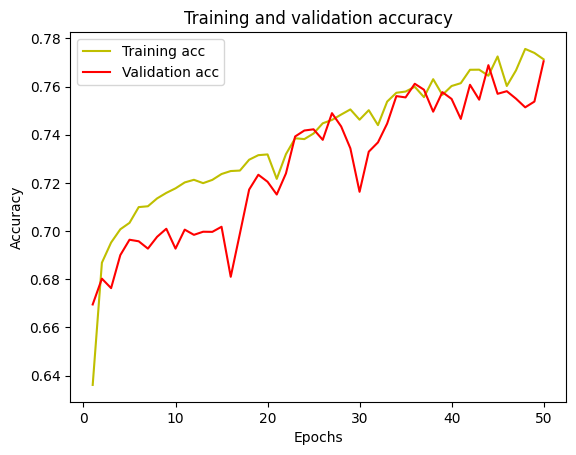

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

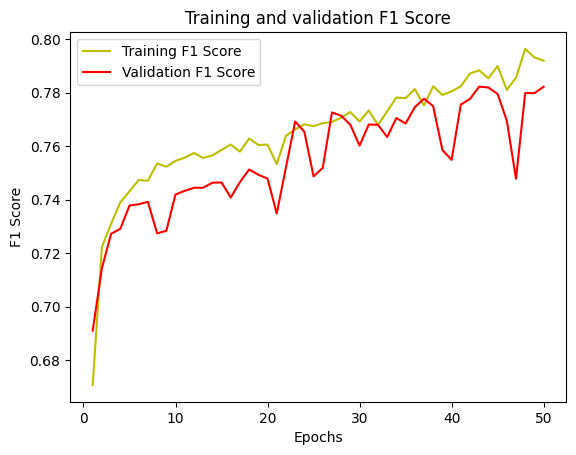

In [48]:
#plot the training and validation F1 Score at each epoch
f1_m = history.history['f1_m']
val_f1_m = history.history['val_f1_m']
plt.plot(epochs, f1_m, 'y', label='Training F1 Score')
plt.plot(epochs, val_f1_m, 'r', label='Validation F1 Score')
plt.title('Training and validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

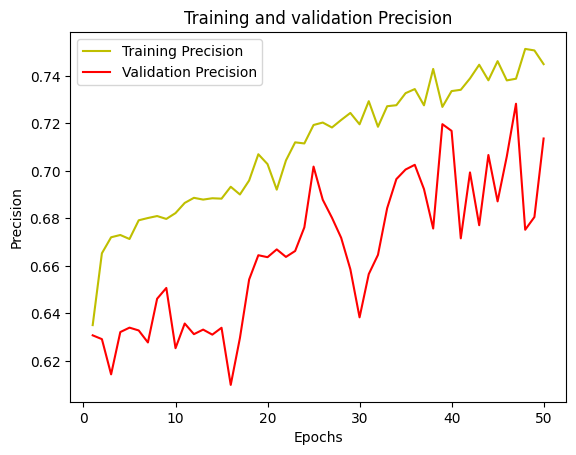

In [49]:
#plot the training and validation precision at each epoch
precision_m = history.history['precision_m']
val_precision_m = history.history['val_precision_m']
plt.plot(epochs, precision_m, 'y', label='Training Precision')
plt.plot(epochs, val_precision_m, 'r', label='Validation Precision')
plt.title('Training and validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

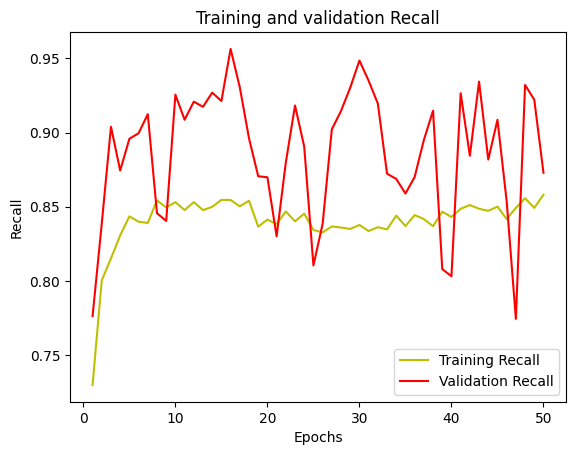

In [50]:
#plot the training and validation recall at each epoch
recall_m = history.history['recall_m']
val_recall_m = history.history['val_recall_m']
plt.plot(epochs, recall_m, 'y', label='Training Recall')
plt.plot(epochs, val_recall_m, 'r', label='Validation Recall')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [51]:
#Load previously saved model
from keras.models import load_model
model = load_model(r'Final Year Project Thesis/UNet_Building_90_10_BS16_E50.hdf5', compile=False)

In [52]:
#IOU
y_pred=model.predict(X_test_)
y_pred_thresholded = y_pred > 0.5

4/4 [==============================] - 9s 2s/step


In [53]:
from tensorflow.keras.metrics import MeanIoU

In [54]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.6253969


(1, 512, 512, 5, 1)
1/1 [==============================] - 0s 124ms/step
(512, 512)


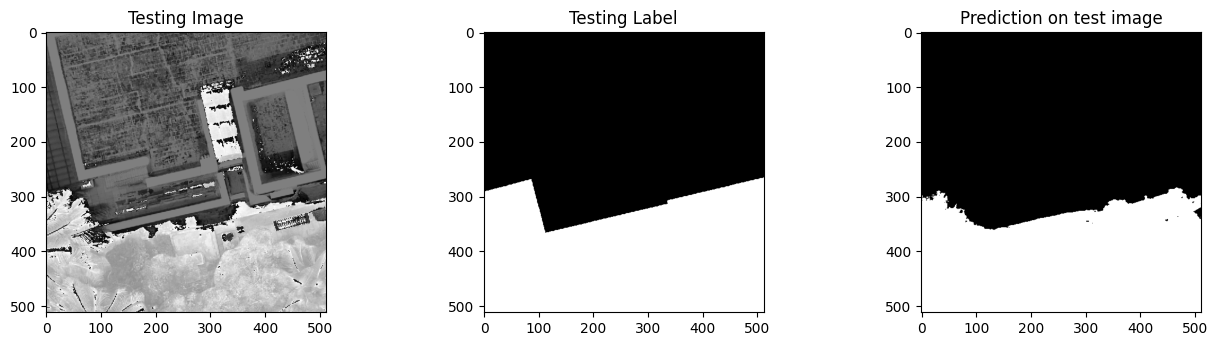

In [94]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test_)-1)
test_img = X_test_[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.show()